<a href="https://colab.research.google.com/github/IamBhanuYenumula/Byen_DataScience_expo/blob/main/Polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

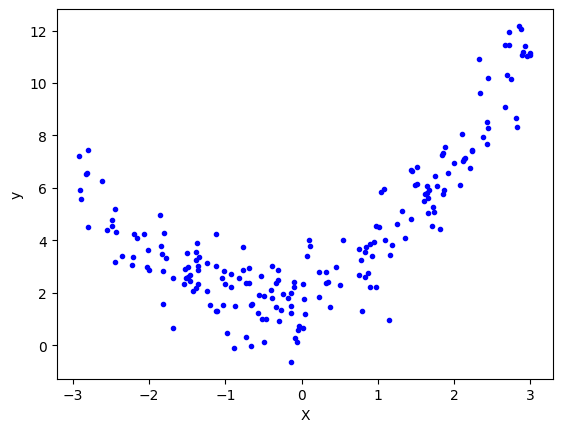

In [19]:
# Generating dataset

X = 6* np.random.rand(200,1) -3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200,1)

# plt.scatter(X,y)
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [20]:
# split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(X_test)

In [22]:
r2 = r2_score(y_test,y_pred)
r2

0.45528050890504446

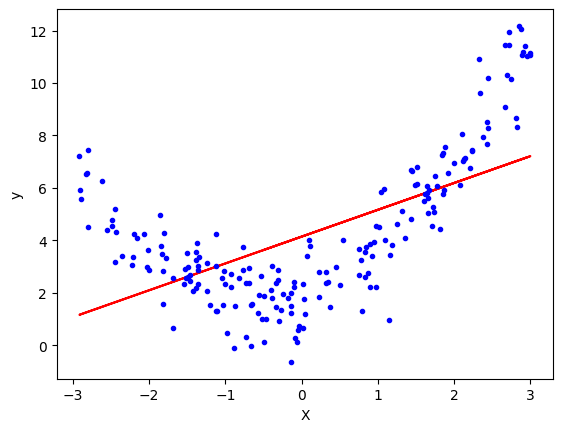

In [25]:
plt.plot(X_train,lr.predict(X_train),color = 'r')
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [26]:
# Applying Polynomial Linear Regression
# degree 2

# Applying Polynomial features before applying polynomial linear regression
poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)


In [27]:
lr=LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(X_test_trans)


In [32]:
r2_t = r2_score(y_test,y_pred)
r2_t

0.9092046465973671

In [35]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.82673254 0.80197442]]
[2.03426826]


In [43]:
X_new=np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

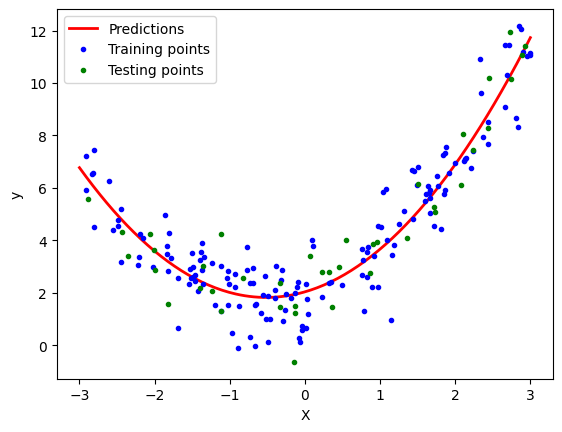

In [44]:
plt.plot(X_new,y_new,"r",linewidth=2, label="Predictions")
plt.plot(X_train,y_train,"b.",label='Training points')
plt.plot(X_test,y_test,"g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()